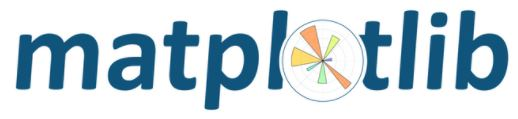

### Table of Contents

* [Overview](##Overview)   
    * [Matplotlib](#Matplotlib)
    * [Matplotlib.pyplot](#Matplotlib.pyplot)
    * [Required Modules](#Required_modules)    
* [Pyplot Commands](#pyplot_commands)
    * [Basic](#section_2_1)
    * [Intermediate](#section_2_2)
    * [Advanced](#section_2_2)  
* [Plot types](#chapter1)
    * [Regular Plot](#section_1_1)
    * [Scatter Plot](#section_1_1)
    * [Bar Plot](#section_1_1) 
    * [Contour Plot](#section_1_1)
    * [Pie Chart](#section_1_1)
    * [Quiver Plot](#section_1_1)
    * [Imshow](#section_1_1)
* [Subplots](#chapter2)
    * [Subplot structure](#section_2_1)  
    * [Subplot examples](#section_2_1)  
* [Explanation of 3 plots](#chapter2)
    * [Barplot](#section_2_1)
    * [Boxplot](#section_2_1)
    * [Pie Chart](#section_2_1)
    * [Multiple Line plot](#section_2_1)  
* [Conclusion](#chapter2)
    * [Section 2.1](#section_2_1)  
* [References](#chapter2)
    * [Section 2.1](#section_2_1)

## Overview <a name="Overview"></a>

### Matplotlib <a name="Matplotlib"></a>

Matplotlib is a low level graph plotting library in python that serves as a visualization utility, it was created by John D. Hunter in 2003.   
Matplotlib is open source and is mostly written in python, a few segments are written in C, Objective-C and Javascript for Platform compatibility.  

https://www.w3schools.com/python/matplotlib_intro.asp

### Matplotlib.pyplot <a name="Matplotlib.pyplot"></a>

Matplotlib.pyplot provides a procedueral interface to the matplotlib object oriented plotting library.    
https://scipy-lectures.org/intro/matplotlib/index.html     

Most of the Matplotlib utilities lies under the pyplot submodule, and are usually imported under the plt alias:    

`import matplotlib.pyplot as plt`  

The %matplotlib inline is a jupyter notebook specific command that let’s you see the plots in the notebook itself.:     

`%matplotlib inline`  

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).  

You can think of the Figure object as a box-like container holding one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels:    

https://realpython.com/python-matplotlib-guide/

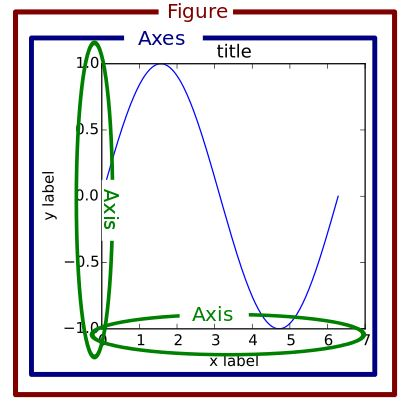

The axes are the area in which the data is graphed with functions such as plot() and scatter(), and can have associated labels.

Each axis has an x-axis and a y-axis, and each contains a numbering.

There are also the labels of the axes, the title, and the legend that must be taken into account when you want to customize the axes, but also taking into account that the scales of the axes and the grid lines can be useful.

The vertebral lines are lines that connect the axis marks and designate the boundaries of the data area, in other words, they are the simple square that you can see when you have initialized.  

https://github.com/jmv74211/matplotlib/blob/master/README.md

Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.     

In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes.   

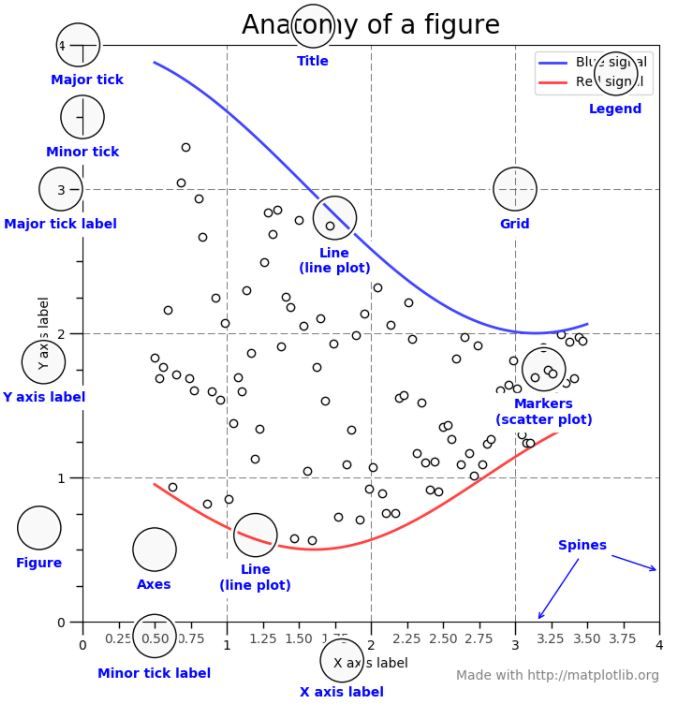

I will explain some of the important commands with interactive examples.

### Required modules <a name="Required_modules"></a>

In [1]:
# Import required modules
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

##  Pyplot Commands <a name="pyplot_commands"></a>

### 1. Basic commands

https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

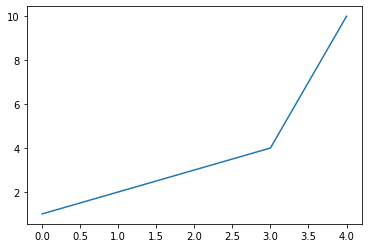

In [2]:
# Let's start by drawing a simple plot
# A line plot is the default
plt.plot([1, 2, 3, 4, 10])
plt.show()

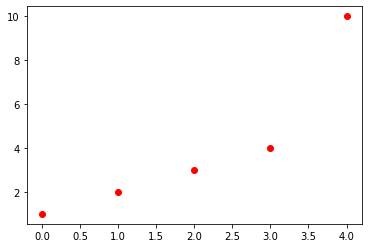

In [3]:
# Changing the line to red circles
plt.plot([1, 2, 3, 4, 10], 'ro')
plt.show()

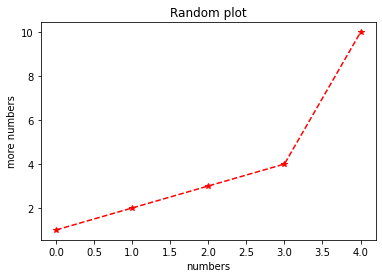

In [4]:
# Adding title
# Adding x axis label
# Adding x axis label
# Change from red circles to red dashes with red stars as the markers
plt.plot([1, 2, 3, 4, 10], 'r*--')
plt.title('Random plot')
plt.xlabel('numbers')
plt.ylabel('more numbers')
plt.show()

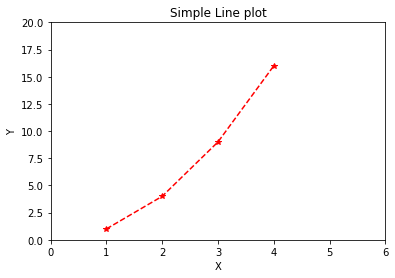

In [5]:
# Setting the axis range as 0 to 6 for the x axis and 0 to 20 for the y axis
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r*--')
plt.axis([0, 6, 0, 20])
plt.title('Simple Line plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

###  2. Intermediate Commands

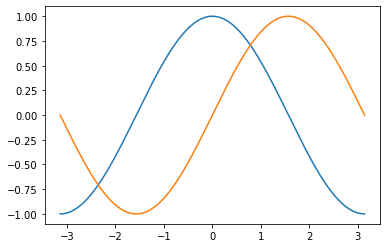

In [6]:
# https://scipy-lectures.org/intro/matplotlib/index.html  

# Draw multiple curves on a single plot
# Draw a cosine and sine functions on the same plot
# X is now a numpy array with 256 values ranging from -π to +π (included). 
X = np.linspace(-np.pi, np.pi, 256)
# C is the cosine (256 values) and S is the sine (256 values).
C, S = np.cos(X), np.sin(X)
plt.plot(X, C)
plt.plot(X, S)
plt.show()

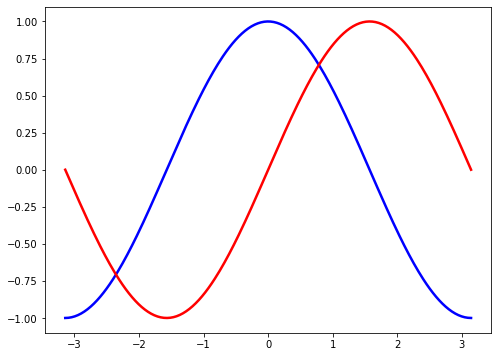

In [7]:
# Increase the figure size to 8,6
plt.figure(figsize=(8, 6))
# Change the cosine line to blue and the sine line to red
# Increase the line width to 2.5 
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
plt.show()

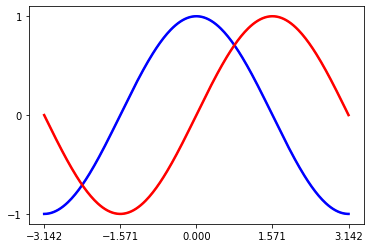

In [8]:
# Add xticks and yticks
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C)
plt.plot(X, S)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
plt.show()

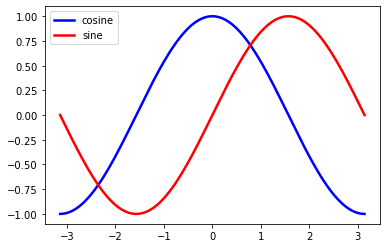

In [9]:
# Adding a label to each line and showing the legend on the upper left of the plot
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.legend(loc='upper left')
plt.show()

Matplotlib comes with a set of default settings that allow customizing all kinds of properties. You can control the defaults of almost every property in matplotlib: figure size and dpi, line width, color and style, axes, axis and grid properties, text and font properties and so on.  
https://scipy-lectures.org/intro/matplotlib/index.html

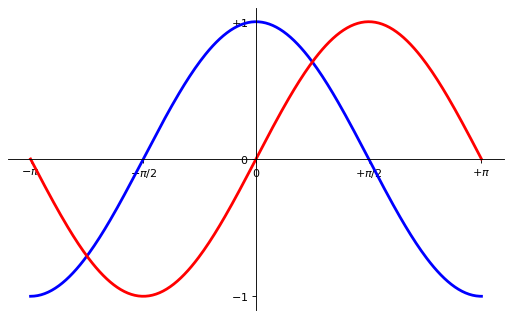

In [10]:
plt.figure(figsize=(8,5), dpi=80)
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C = np.cos(X)
S = np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])

plt.show()

## 3. Plot types

The main plot types of matplotlib.pyplot are:  
1. Regular Plot
2. Scatter Plot  
3. Bar Plot
4. Contour Plot
5. Pie Chart
6. Quiver Plot  
7. Imshow

* **Regular Plot**

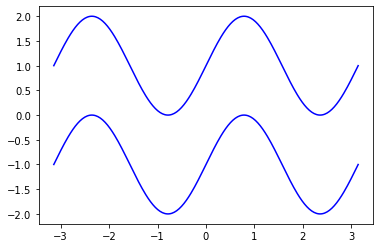

In [11]:
n = 256
X = np.linspace(-np.pi, np.pi, n)
Y = np.sin(2 * X)

plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.plot(X, Y - 1, color='blue', alpha=1.00)
plt.show()

* **Scatter Plot**

A scatter plot uses dots to represent values for two different numeric variables.

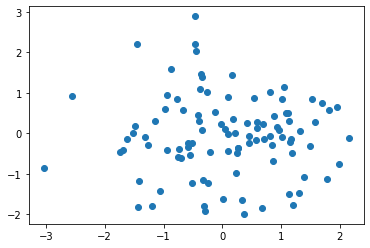

In [12]:
n = 100
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()

* **Bar Plots**

A bar plot presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

(-1.25, 1.25)

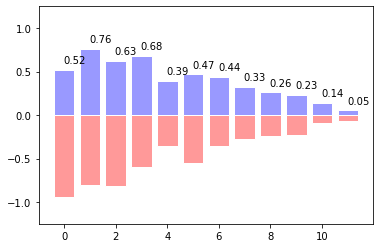

In [13]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')

plt.ylim(-1.25, +1.25)

* **Contour Plots**

A contour plot is a graphical technique for representing a 3-dimensional surface by plotting constant z slices, called contours, on a 2-dimensional format.

<ipython-input-14-7e33984f27c6>:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)


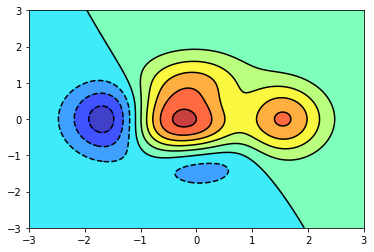

In [14]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)

* **Pie Charts**

A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion.

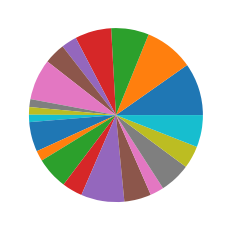

In [15]:
Z = np.random.uniform(0, 1, 20)
plt.pie(Z)
plt.show()

* **Quiver Plots**

Quiver plot is basically a type of 2D plot which shows vector lines as arrows.

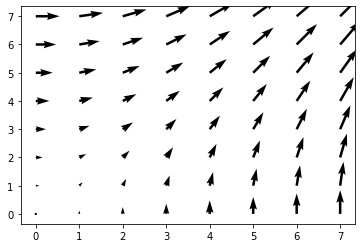

In [16]:
n = 8
X, Y = np.mgrid[0:n, 0:n]
plt.quiver(X, Y)
plt.show()

* **Imshow**

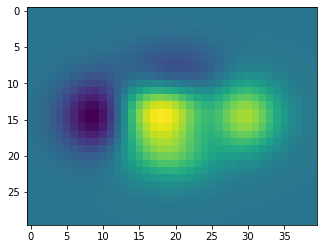

In [17]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)
plt.imshow(f(X, Y))

## 4.Subplots

###  Subplot structure

We call plt.plot() when we only want to draw one plot. To draw two plots side by side, we call for the subplots as follows plt.subplots()

With subplot you can arrange plots in a regular grid. You need to specify the number of rows and columns and the number of the plot, an example is shown below.  
https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/  


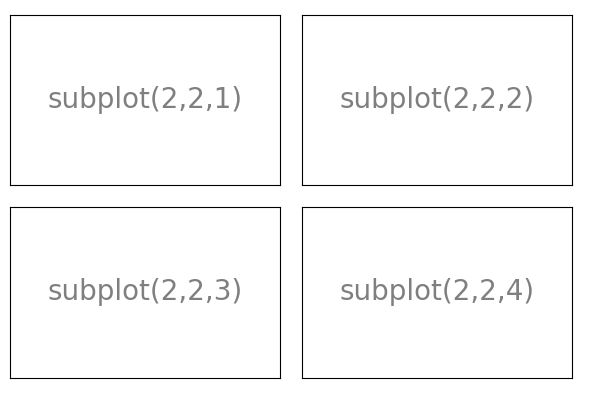

The subplots() function takes three arguments that describes the layout of the figure.

The layout is organized in rows and columns, which are represented by the first and second argument.

The third argument represents the index of the current plot.  

https://www.w3schools.com/python/matplotlib_subplots.asp

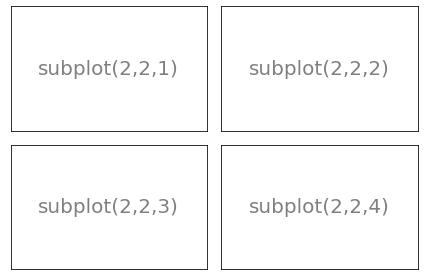

In [18]:
# https://scipy-lectures.org/intro/matplotlib/auto_examples/plot_subplot-grid.html
plt.figure(figsize=(6, 4))

#the figure has 2 row, 2 columns, and this plot is the first plot.
plt.subplot(2, 2, 1)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, 'subplot(2,2,1)', ha='center', va='center',
        size=20, alpha=.5)

#the figure has 2 row, 2 columns, and this plot is the second plot.
plt.subplot(2, 2, 2)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, 'subplot(2,2,2)', ha='center', va='center',
        size=20, alpha=.5)

#the figure has 2 row, 2 columns, and this plot is the third plot.
plt.subplot(2, 2, 3)
plt.xticks([])
plt.yticks([])

plt.text(0.5, 0.5, 'subplot(2,2,3)', ha='center', va='center',
        size=20, alpha=.5)

#the figure has 2 row, 2 columns, and this plot is the fourth plot.
plt.subplot(2, 2, 4)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, 'subplot(2,2,4)', ha='center', va='center',
        size=20, alpha=.5)

plt.tight_layout()
plt.show()

###  Subplot examples

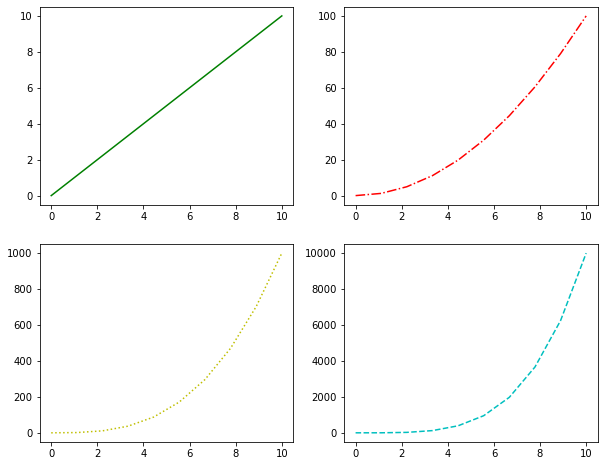

In [19]:
# https://pythonguides.com/matplotlib-subplot-tutorial/
# Preparing the data to subplots
x = np.linspace(0, 10, 10)
y1 = x
y2 = x ** 2
y3 = x ** 3
y4 = x ** 4

plt.figure(figsize=(10, 8))

# Plot the subplots
# Plot 1
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'g')

# Plot 2
plt.subplot(2, 2, 2)
plt.plot(x, y2, '-.r')

# Plot 3
plt.subplot(2, 2, 3)
plt.plot(x, y3, ':y')

# Plot 4
plt.subplot(2, 2, 4)
plt.plot(x, y4, '--c')

plt.show()

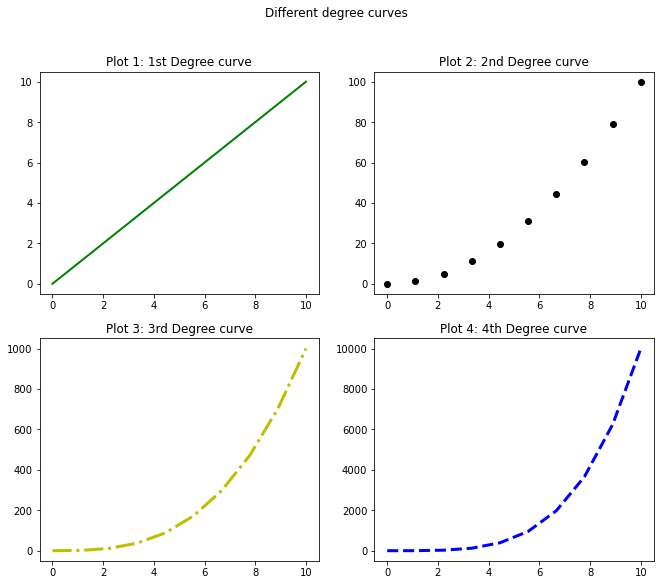

In [20]:
#Change the figure size
plt.figure(figsize=[11, 9])

# Preparing the data to subplots
x = np.linspace(0, 10, 10)
y1 = x
y2 = x ** 2
y3 = x ** 3
y4 = x ** 4

# Adding title to the plot
plt.suptitle('Different degree curves')

# Plot the subplots
# Alter linewidths 
# Add individual plot titles 

# Plot 1
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'g', linewidth=2)
plt.title('Plot 1: 1st Degree curve')

# Plot 2
plt.subplot(2, 2, 2)
plt.scatter(x, y2, color='k')
plt.title('Plot 2: 2nd Degree curve')

# Plot 3
plt.subplot(2, 2, 3)
plt.plot(x, y3, '-.y', linewidth=3)
plt.title('Plot 3: 3rd Degree curve')

# Plot 4
plt.subplot(2, 2, 4)
plt.plot(x, y4, '--b', linewidth=3)
plt.title('Plot 4: 4th Degree curve')

plt.show()

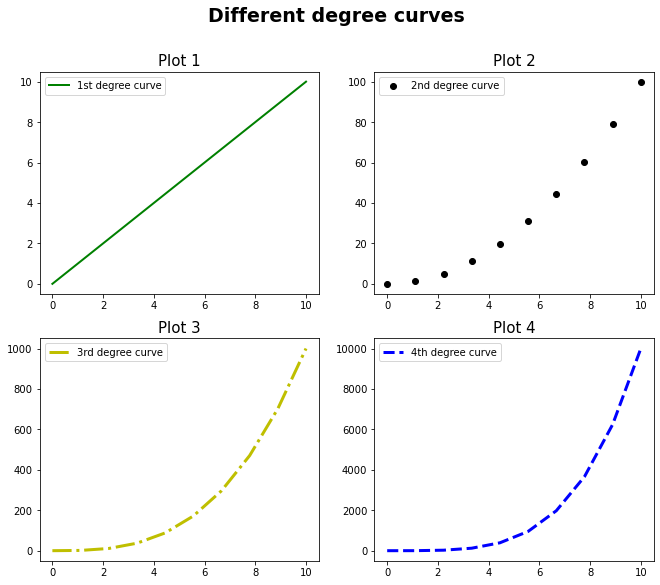

In [21]:
plt.figure(figsize=[11, 9])
x = np.linspace(0, 10, 10)
y1 = x
y2 = x ** 2
y3 = x ** 3
y4 = x ** 4

plt.suptitle('Different degree curves', fontsize=19, fontweight='bold')

# Add in a legend for each subplot 

# Plot 1
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'g', linewidth=2, label='1st degree curve')
plt.title('Plot 1', fontsize=15)
plt.legend(loc='upper left')

# Plot 2
plt.subplot(2, 2, 2)
plt.scatter(x, y2, color='k', label='2nd degree curve')
plt.title('Plot 2', fontsize=15)
plt.legend(loc='upper left')

# Plot 3
plt.subplot(2, 2, 3)
plt.plot(x, y3, '-.y', linewidth=3, label='3rd degree curve')
plt.title('Plot 3', fontsize=15)
plt.legend(loc='upper left')

# Plot 4
plt.subplot(2, 2, 4)
plt.plot(x, y4, '--b', linewidth=3, label='4th degree curve')
plt.title('Plot 4', fontsize=15)
plt.legend(loc='upper left')

plt.show()

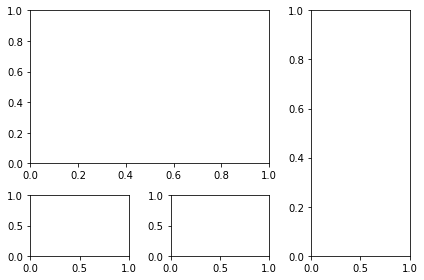

In [22]:
# Customise matplotlib's subplot's layout
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2) # topleft
ax3 = plt.subplot2grid((3,3), (0,2), rowspan=3)            # right
ax4 = plt.subplot2grid((3,3), (2,0))                       # bottom left
ax5 = plt.subplot2grid((3,3), (2,1))                       # bottom right
fig.tight_layout()

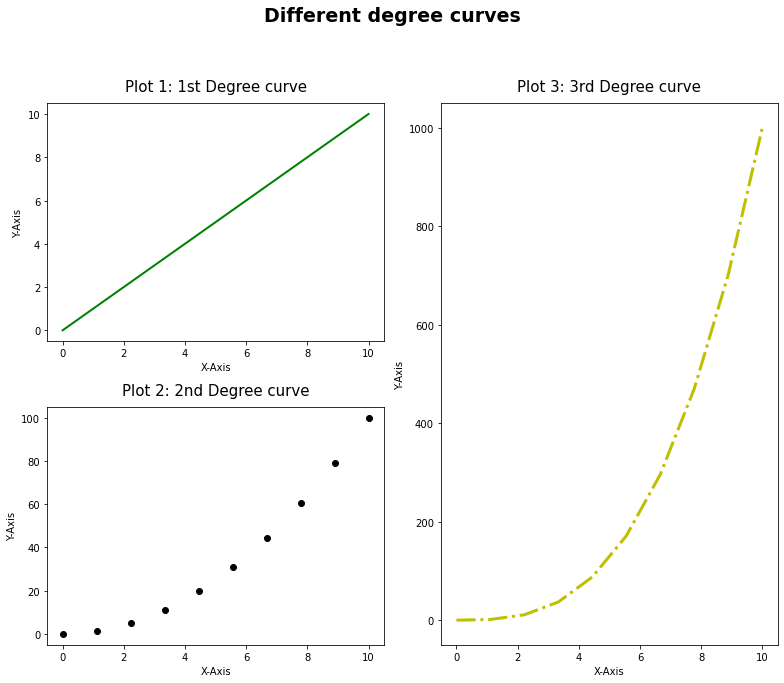

In [23]:
# Preparing the data to subplots
x = np.linspace(0, 10, 10)
y1 = x
y2 = x ** 2
y3 = x ** 3

# Change the figure size
plt.figure(figsize=[11, 9])

plt.suptitle('Different degree curves', y=1.05, fontsize=19, fontweight='bold')

# Plot the subplots
# Plot 1
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'g', linewidth=2)
plt.title('Plot 1: 1st Degree curve', fontsize=15, pad=12)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Plot 2
plt.subplot(2, 2, 3)
plt.scatter(x, y2, color='k')
plt.title('Plot 2: 2nd Degree curve', fontsize=15, pad=12)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Plot 3
plt.subplot(1, 2, 2)
plt.plot(x, y3, '-.y', linewidth=3)
plt.title('Plot 3: 3rd Degree curve', fontsize=15, pad=12)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.tight_layout()
plt.show()

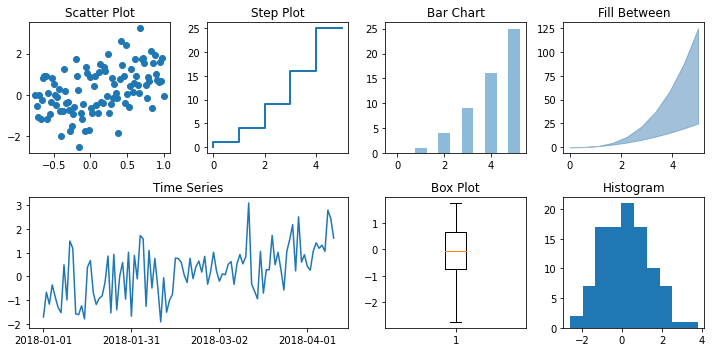

In [24]:
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((2,4), (0,0)) 
ax2 = plt.subplot2grid((2,4), (0,1)) 
ax3 = plt.subplot2grid((2,4), (0,2)) 
ax4 = plt.subplot2grid((2,4), (0,3)) 
ax5 = plt.subplot2grid((2,4), (1,0), colspan=2) 
ax6 = plt.subplot2grid((2,4), (1,2)) 
ax7 = plt.subplot2grid((2,4), (1,3)) 

# Input Arrays
n = np.array([0,1,2,3,4,5])
x = np.linspace(0,5,10)
xx = np.linspace(-0.75, 1., 100)

# Scatterplot
ax1.scatter(xx, xx + np.random.randn(len(xx)))
ax1.set_title("Scatter Plot")

# Step Chart
ax2.step(n, n**2, lw=2)
ax2.set_title("Step Plot")

# Bar Chart
ax3.bar(n, n**2, align="center", width=0.5, alpha=0.5)
ax3.set_title("Bar Chart")

# Fill Between
ax4.fill_between(x, x**2, x**3, color="steelblue", alpha=0.5);
ax4.set_title("Fill Between");

# Time Series
dates = pd.date_range('2018-01-01', periods = len(xx))
ax5.plot(dates, xx + np.random.randn(len(xx)))
ax5.set_xticks(dates[::30])
ax5.set_xticklabels(dates.strftime('%Y-%m-%d')[::30])
ax5.set_title("Time Series")

# Box Plot
ax6.boxplot(np.random.randn(len(xx)))
ax6.set_title("Box Plot")

# Histogram
ax7.hist(xx + np.random.randn(len(xx)))
ax7.set_title("Histogram")

fig.tight_layout()

## 3 Interesting Plots

### Barplot

In [29]:
# Read in the dataset
df_fifa21 = pd.read_csv('fifa-data/fifa2021players.csv')
# Select the countries you want to analyse
country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina', 'Republic of Ireland']
# Creating a dataframe of the data of all the players whose nationality is one of the 5 selected countries
df_country = df_fifa21[df_fifa21['nationality'].isin(country)]

In [30]:
# Calculating the mean for each of the 6 countries
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]
barplot

,nationality,overall
0,Argentina,67.793803
1,Brazil,70.961669
2,Canada,62.346154
3,England,62.878338
4,Republic of Ireland,60.825444
5,United States,63.507937


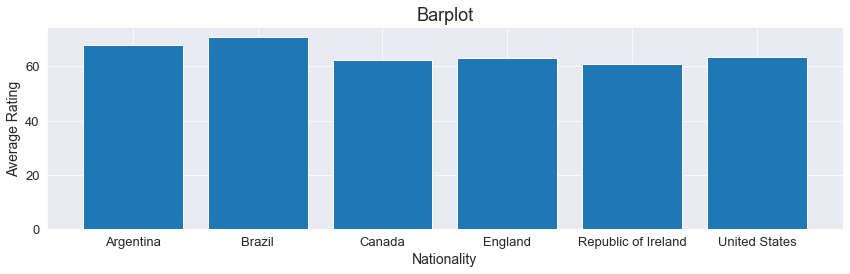

In [31]:
# Barplot with default matplotlib colours
plt.figure(figsize=(12,4), tight_layout=True)
plt.bar(barplot['nationality'], barplot['overall'])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.show()

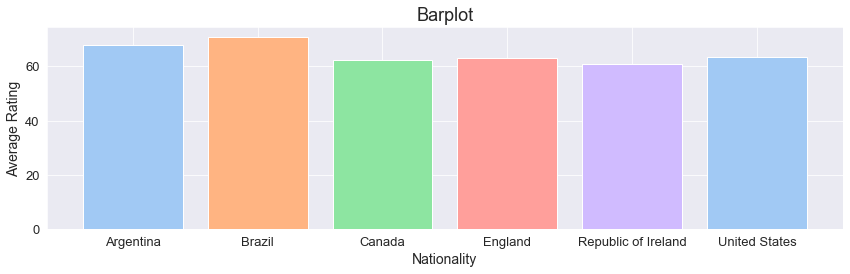

In [32]:
# Using the seaborn colour palette pastel to make the plot visually more appealing
plt.figure(figsize=(12,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.show()

This shows there is no big difference between the rating of an average player from Canada, England Republic of Ireland and the USA.   
However, average players don’t make it to the national teams, only the top players in each country do it, so if we get the average rating of the top 20 players, the plot would change.

In [33]:
# Create a dataframe of the top 20 players from each country
new_df = pd.concat(
[df_country[df_country['nationality']=='Argentina'][:20], 
 df_country[df_country['nationality']=='Brazil'][:20], 
 df_country[df_country['nationality']=='England'][:20], 
 df_country[df_country['nationality']=='Canada'][:20], 
 df_country[df_country['nationality']=='United States'][:20], 
 df_country[df_country['nationality']=='Republic of Ireland'][:20]]
)
barplot = new_df.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

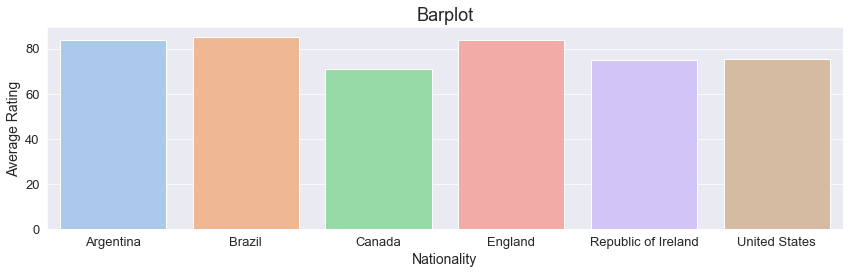

In [34]:
plt.figure(figsize=(12,4), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['overall'], palette='pastel', ci=None)
ax.set(title='Barplot', xlabel='Nationality', ylabel='Average Rating')
plt.show()

The difference in ratings between top players is evident. This reveals Ireland along with the USA and Canada aren’t big football nations!

Let’s see how many players play in the top football leagues. To do so, we need to group the data by nationality and league (we’ll leave out the Premier League since most Ireland players play in this competition). I will use the seaborn package to display the barplot. 

In [35]:
# List the main European Leagues, excluding the English premier league. 
# For the Republic of Ireland players, the English premier league is their domestic league
barplot = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]
barplot = barplot.groupby(['nationality', 'league_name'], as_index=False).count()

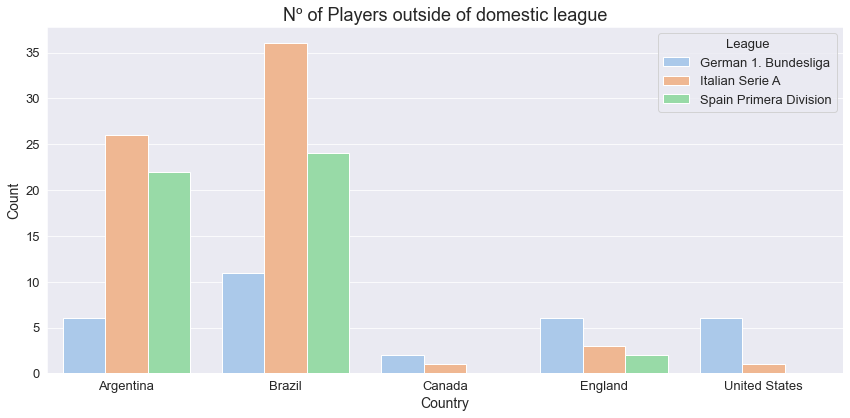

In [36]:
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['sofifa_id'], 
                 hue=barplot['league_name'], palette='pastel')
ax.set(title='Nº of Players outside of domestic league' ,xlabel='Country', ylabel='Count')
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.show()

As we can see, most Argentine and Brazilian footballers play in the top leagues while Canadians and Americans don’t. Players in top leagues make an impact on the national team's success in competitions, so this explains why Brazil and Argentina are big football nations

What the barplot also shows us is no Republic of Ireland players is playing in the top 3 European Leagues (outside of the English Premier League).   
So let's include the Premier League into the plot. 

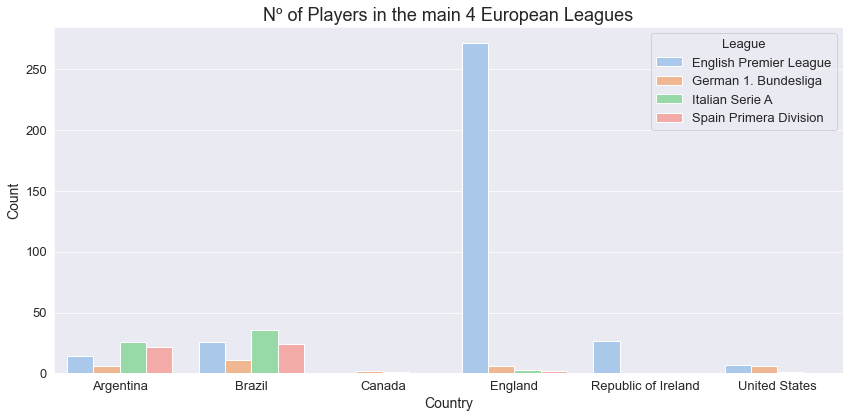

In [37]:
barplot = df_country[df_country['league_name'].isin(['Spain Primera Division', 
                                                     'Italian Serie A', 'German 1. Bundesliga', 'English Premier League'])]
barplot = barplot.groupby(['nationality', 'league_name'], as_index=False).count()
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['sofifa_id'], 
                 hue=barplot['league_name'], palette='pastel')
ax.set(title='Nº of Players in the main 4 European Leagues' ,xlabel='Country', ylabel='Count')
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.show()

The Republic of Ireland appear, but our numbers are only marginally higher than United States, showing why we are not one of top football countries. 

### Boxplot

Boxplots display the distribution of data based on the minimum value, first quartile (Q1), median, third quartile (Q3), and maximum value. In this case, we’ll make a boxplot showing the height distribution in players from the 6 countries

Boxplots of multiple categorical variables can be plotted on Matplotlib but it needs some extra preprocessing, so to keep things simple we’ll use Seaborn’s sns.boxplot(). When making boxplots with multiple categorical variables we need two arguments — the name of the categorical variable (nationality) and the name of the numerical variable (height_cm)


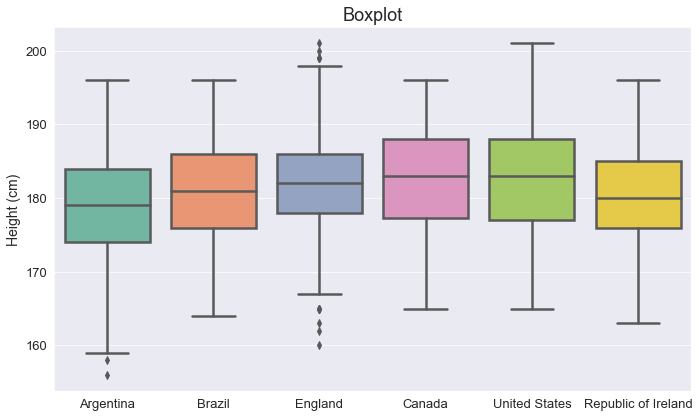

In [39]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=df_country, x='nationality', y='height_cm', palette='Set2', linewidth=2.5)
ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')
plt.show()

The boxplot reveals that a national team doesn’t need many tall football players to succeed in competitions since the median of Argentina and Brazil is lower than in the rest of the countries. Argentina even presents the shortest football players among the six countries represented by the long bottom whisker.

#### Scatterplot

A scatter plot displays and shows the relation between two numerical variables in a dataset. In this case, we’ll see the relationship between the height and weight of players.

In this plot, we added the sto control the dot size and also hue to differentiate the nationality

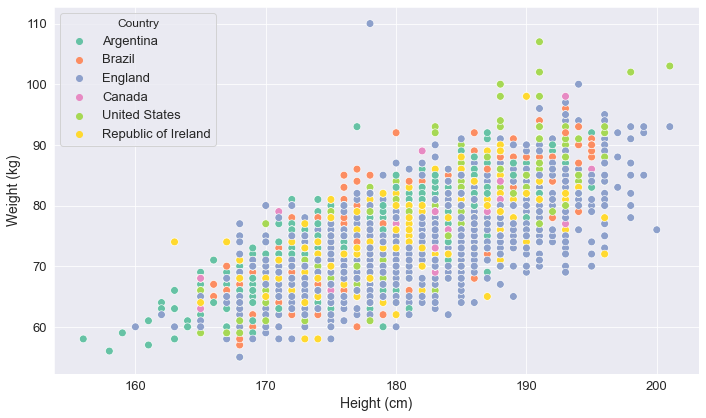

In [40]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

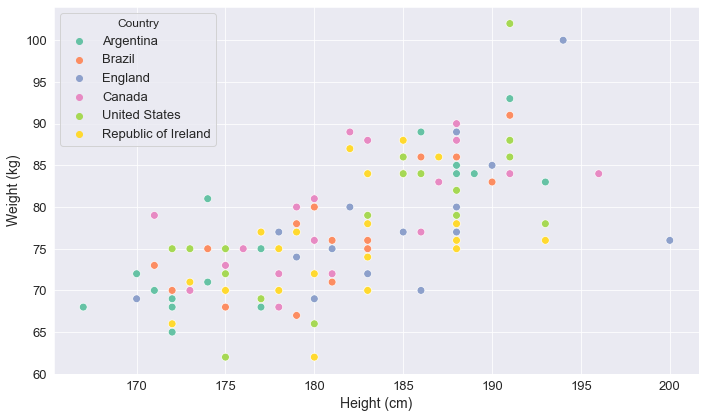

In [72]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=new_df, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

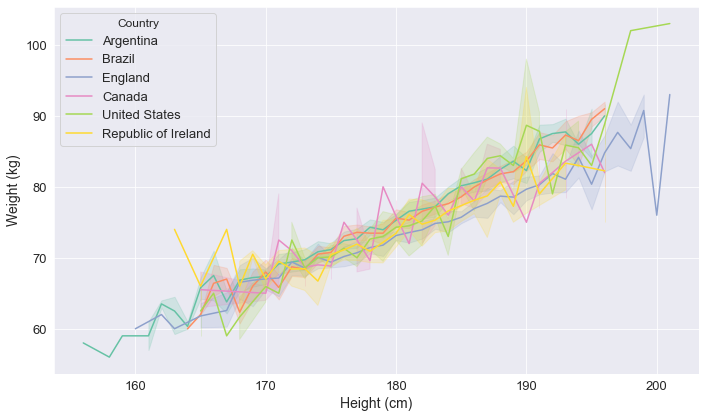

In [77]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.lineplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2')
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

From this scatterplot, we can see that weight and height distribution fit a simple linear regression.


#### Pie Chart

We’re going to make a piechart that displays the value of players. In this example, we’ll pick the most valuable player for the Republic of Ireland.

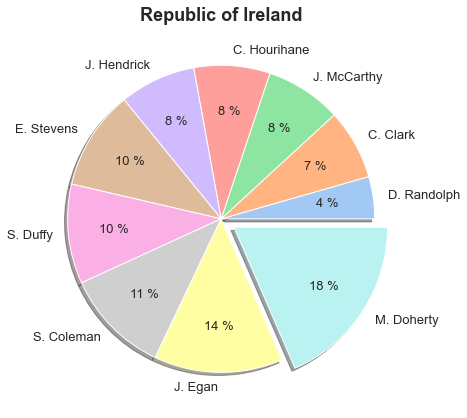

In [70]:
plt.figure(figsize=(7, 6), tight_layout=True)
piechart = df_fifa21[df_fifa21['nationality']=='Republic of Ireland']
piechart = piechart[:10].sort_values('value_eur')[['short_name', 'value_eur']]
colors = sns.color_palette('pastel')
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Republic of Ireland', weight='bold')
plt.show()

Matt Doherty is the most valuable Republic of Ireland player, let's see how valuable he is in his club, Tottenham Hotspur.

In [67]:
# Identify the club Tottenham Hotpsur
piechart = df_fifa21[df_fifa21['club_name']=='Tottenham Hotspur']
# Piechart to be sorted based on descending value
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
# How many players we want to show
piechart = piechart[:15]

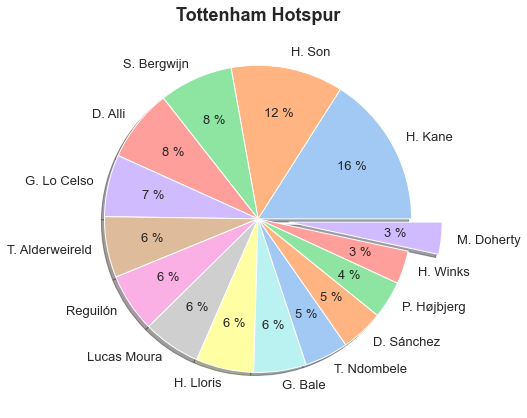

In [68]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
# autocpt to round the numbers to the closest %
# explode to highlight the specific player
# pctdistance to adjust the distance of the labels
# shadow=True to give the chart a solid appearance
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Tottenham Hotspur', weight='bold')
plt.show()

The piechart shows that Matt Doherty isn’t the most valuable player in his club, he is only in the top 15.  
With football being an 11 a side team, and being only the 15th most valuable player for Tottenham Hotspur, depending on the position Matt plays in he may not be guaranteed his place on the starting team. 

Now let’s plot 2 piecharts side by side to see the impact of this player on his club and national team. To do so, we’ll use plt.subplots(nrows, ncols). Here the rows and the columns determine the number of plots we’re going to create so nrow=1 and ncols=2 means 1 plot per column (2 in total).

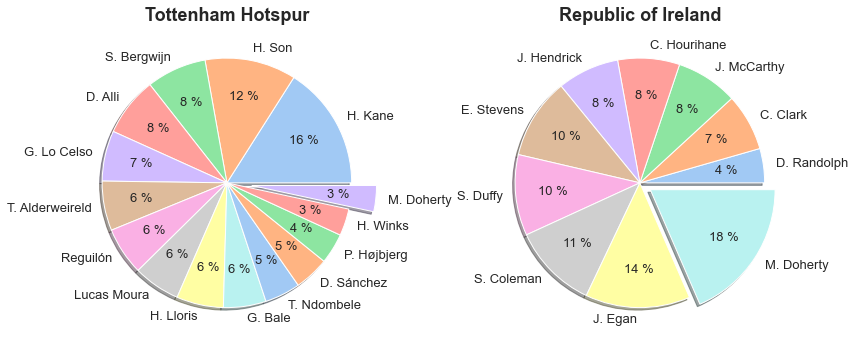

In [69]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)

piechart = df_fifa21[df_fifa21['club_name']=='Tottenham Hotspur']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
piechart = piechart[:15]

# Preprocessing
piechart2 = df_fifa21[df_fifa21['nationality']=='Republic of Ireland']
piechart2 = piechart2[:10].sort_values('value_eur')[['short_name', 'value_eur']]

colors = sns.color_palette('pastel')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Tottenham Hotspur', weight='bold')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('Republic of Ireland', weight='bold')
plt.show()

Now we can verify that Matt Dohery is by far the most valuable Republic of Ireland player, but in his club, there are other skillful players ahead of him. 

In [45]:
# preprocessing
df_fifa21 = pd.read_csv('fifa-data/fifa2021players.csv')
df_fifa20 = pd.read_csv('fifa-data/fifa2020players.csv')
df_fifa19 = pd.read_csv('fifa-data/fifa2019players.csv')
df_fifa18 = pd.read_csv('fifa-data/fifa2018players.csv')
df_fifa17 = pd.read_csv('fifa-data/fifa2017players.csv')
frames = [df_fifa17, df_fifa18, df_fifa19, df_fifa20, df_fifa21]
for i, frame in enumerate(frames):
    frame['year'] = 2017 + i
    
lineplot = pd.concat(frames)[['short_name', 'overall', 'year']]
list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
lineplot = lineplot[lineplot['short_name'].isin(list_players)]
lineplot = lineplot.pivot(index='short_name', columns='year' ,values='overall').T
lineplot.reset_index(inplace=True)
lineplot = lineplot.set_index('year')

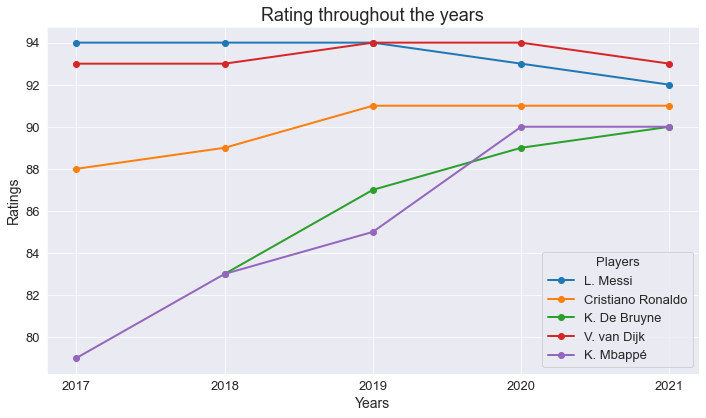

In [46]:
plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(lineplot, 'o-', linewidth=2)
#customization
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating throughout the years')
plt.legend(title='Players', title_fontsize = 13, labels=['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'V. van Dijk', 'K. Mbappé'])
plt.show()

In [47]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html